#**Forecasting Sticker Sales**
>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!unzip "/content/drive/MyDrive/Forecasting Stricker Sales/playground-series-s5e1.zip" -d "/content/drive/MyDrive/Forecasting Stricker Sales#"

##**Import Tools**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##**Lets Import Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/Forecasting Stricker Sales/train.csv")
test_data=pd.read_csv('/content/drive/MyDrive/Forecasting Stricker Sales/test.csv')

In [7]:
train_data.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [8]:
train_data.shape

(230130, 6)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
train_data.describe()


,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [11]:
# check value counts for nymeric columns

for label,content in train_data.items():
  if pd.api.types.is_numeric_dtype(content):
    print(f'Value Counts For Column Numeric:{label}')
    print(train_data[label].value_counts())
    print("--"*40)

Value Counts For Column Numeric:id
id
0         1
153494    1
153412    1
153413    1
153414    1
         ..
76714     1
76715     1
76716     1
76717     1
230129    1
Name: count, Length: 230130, dtype: int64
--------------------------------------------------------------------------------
Value Counts For Column Numeric:num_sold
num_sold
5.0       1947
6.0       1703
16.0      1434
7.0       1382
15.0      1365
          ... 
3621.0       1
3683.0       1
4139.0       1
3349.0       1
3996.0       1
Name: count, Length: 4037, dtype: int64
--------------------------------------------------------------------------------


In [12]:
# check value counts for object columns
for label,content in train_data.items():
  if pd.api.types.is_object_dtype(content):
    print(f'The Value Count For Objects:{label}')
    print(train_data[label].value_counts())
    print("--"*40)

The Value Count For Objects:date
date
2010-01-01    90
2014-09-05    90
2014-08-29    90
2014-08-30    90
2014-08-31    90
              ..
2012-05-03    90
2012-05-04    90
2012-05-05    90
2012-05-06    90
2016-12-31    90
Name: count, Length: 2557, dtype: int64
--------------------------------------------------------------------------------
The Value Count For Objects:country
country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64
--------------------------------------------------------------------------------
The Value Count For Objects:store
store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64
--------------------------------------------------------------------------------
The Value Count For Objects:product
product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46

##**Data Analysis & Visualization**

In [13]:
train_data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [14]:
# make a copy of our dataframe
df=train_data.copy()

In [15]:
avg_sales=train_data.groupby('country')['num_sold'].mean()
avg_sales

,num_sold
country,
Canada,840.045003
Finland,748.243306
Italy,542.241403
Kenya,20.431100
Norway,1422.560422
Singapore,863.052379


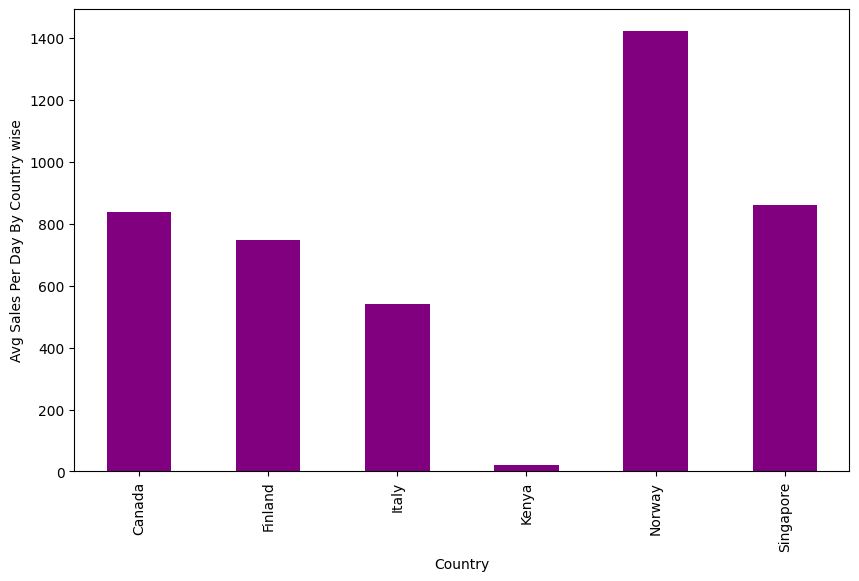

In [16]:
avg_sales.plot(kind='bar',
               figsize=(10,6),
               xlabel='Country',
               ylabel='Avg Sales Per Day By Country wise',
               color='purple')
plt.show()

In [17]:
total_sales=train_data.groupby('country')['num_sold'].sum()
total_sales

,num_sold
country,
Canada,28653095.0
Finland,28698872.0
Italy,20797669.0
Kenya,689141.0
Norway,54562305.0
Singapore,33102374.0


In [18]:
total_sales_df = total_sales.reset_index()
total_sales_df.columns = ["Country", "num_sold"]
total_sales_df

,Country,num_sold
0,Canada,28653095.0
1,Finland,28698872.0
2,Italy,20797669.0
3,Kenya,689141.0
4,Norway,54562305.0
5,Singapore,33102374.0


In [19]:
import plotly.express as px
fig1 = px.choropleth(total_sales_df,
                    locations="Country",
                    locationmode='country names',
                    color="num_sold",
                    hover_name="Country",
                    title="Sales Distribution by Country (in Units Sold)",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig1.update_layout(
    coloraxis_colorbar=dict(
        title="Total Units Sold (in millions)"
    ),
    title_font_size=20
)
fig1.show()

In [20]:
store = train_data.groupby('store')['num_sold'].sum().reset_index()
store.columns = ["Store", "num_sold"]
store


,Store,num_sold
0,Discount Stickers,30599237.0
1,Premium Sticker Mart,73703822.0
2,Stickers for Less,62200397.0


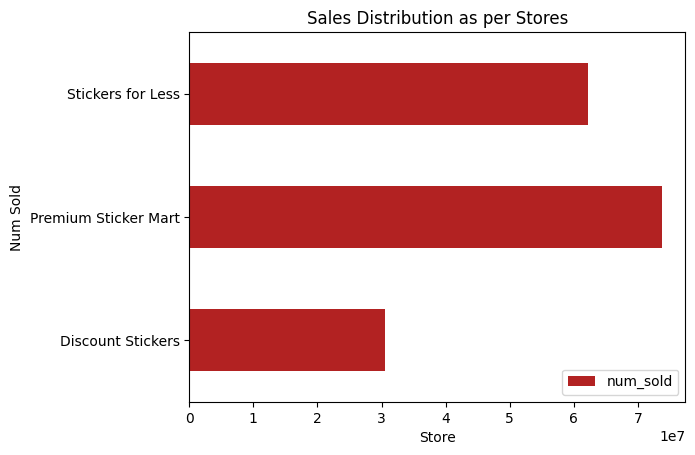

In [21]:
store.plot(x='Store', y='num_sold',
           kind='barh',
           color='firebrick',
           xlabel='Store',
           ylabel='Num Sold',
           title='Sales Distribution as per Stores')
plt.show()

In [22]:
df_viz = train_data.groupby(['store', 'product'])['num_sold'].sum().reset_index()
df_viz.columns = ['Store', 'Product', 'num_sold']
df_viz = df_viz.sort_values('Store')

# Create a bar chart
fig = px.bar(df_viz,x='Store',y='num_sold', color='Product',title="Sales Distribution By Products And Stores")
fig.update_traces(textposition='auto',textfont_size=20)
fig.update_layout(barmode='group')
fig.show()


##**Baseline Model Prediction with Random Forest Regressor**


In [23]:
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
import joblib
import os

# Feature Engineering
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# Split Features & Target (UNSORTED for final training)
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# Build scikit-learn Pipeline
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])


# Generate Timestamp

timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Time-based Cross Validation with OOF Predictions
# Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# Build X_sorted, y_sorted from the RE-INDEXED DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# Prepare OOF array
oof_predictions = np.zeros(len(train_data_sorted))

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]

    # Fit
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)

    # Store OOF predictions
    oof_predictions[valid_index] = preds

    # Compute MAPE
    mape = np.mean(np.abs((y_valid_cv - preds) / y_valid_cv))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))


# Save OOF Predictions


# Match OOF predictions to the correct IDs from the re-indexed DataFrame
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})

oof_filename = f"oof_predictions_m01_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# Train on Full Dataset & Predict on Test

model_pipeline.fit(X, y)
test_preds = model_pipeline.predict(X_test)

# Define the directory and ensure it exists
model_dir = "/content/drive/MyDrive/model"
os.makedirs(model_dir, exist_ok=True)

# Create the full file path
model_filename = f"model_01_{timestamp_str}.pkl"
model_filepath = os.path.join(model_dir, model_filename)

# Save the model
joblib.dump(model_pipeline, model_filepath)
print(f"Trained model saved as {model_filepath}")


# Submission
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

# Define the directory and ensure it exists
submission_dir = "/content/drive/MyDrive/Submission File"
os.makedirs(submission_dir, exist_ok=True)

# Create the full file path
submission_filename = f"sub_m01_{timestamp_str}.csv"
submission_filepath = os.path.join(submission_dir, submission_filename)

# Save the submission file
submission.to_csv(submission_filepath, index=False)
print(f"Submission saved as {submission_filepath}")

Train shape after dropping missing target: (221259, 6)


<ipython-input-23-0b986edca23c>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-0b986edca23c>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-0b986edca23c>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fold 1 MAPE: 9.78%
Fold 2 MAPE: 8.69%
Fold 3 MAPE: 7.41%
Fold 4 MAPE: 11.84%
Fold 5 MAPE: 7.80%
TimeSeriesSplit MAPE Scores: [0.09783607505828223, 0.08687342639003247, 0.07410697702212209, 0.11835915101525217, 0.07797291953808218]
Average MAPE: 0.09102970980475424
OOF predictions saved as oof_predictions_m01_20250111_033814.csv
Trained model saved as /content/drive/MyDrive/model/model_01_20250111_033814.pkl
Submission saved as /content/drive/MyDrive/Submission File/sub_m01_20250111_033814.csv


In [25]:
#load our model
import joblib

# Load the model
model = joblib.load('/content/drive/MyDrive/model/model_01_20250111_033814.pkl')



In [26]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['year', 'month', 'dayofweek']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['country', 'store', 'product'])])),
  ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(tra

##**Hyperparameter Tuning for RandomForestRegressor**

In [30]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import datetime
import numpy as np
import os
import joblib
import pandas as pd

# MAPE scoring function
def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE
mape_scorer = make_scorer(mape, greater_is_better=False)  # Lower MAPE is better

# Timestamp for file naming
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Parameter grid for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, 50, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 5],
    'regressor__max_features': ['sqrt', 'log2', None],
}

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with TimeSeriesSplit and MAPE scoring
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring=mape_scorer,  # Use MAPE as the scoring metric
    n_jobs=-1,
    verbose=3
)

# Fit the grid search to the sorted training data iam going to try with 10000 samples to save time
grid_search.fit(X_sorted[:10000], y_sorted[:10000])

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Score (MAPE): {-grid_search.best_score_:.2f}%")  # Convert to positive percentage

# Save the model to the model directory
model_dir = "/content/drive/MyDrive/model"
os.makedirs(model_dir, exist_ok=True)

model_filename = f"tuned_model_01_{timestamp_str}.pkl"
model_filepath = os.path.join(model_dir, model_filename)

joblib.dump(grid_search, model_filepath)
print(f"Trained model saved as {model_filepath}")

# Train on the full dataset using the best parameters
best_model_pipeline = grid_search.best_estimator_
best_model_pipeline.fit(X, y)

# Predict on test set
test_preds = best_model_pipeline.predict(X_test)

# Save test predictions to submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

# Save submission file to submission directory
submission_dir = "/content/drive/MyDrive/Submission File"
os.makedirs(submission_dir, exist_ok=True)

submission_filename = f"tuned_sub_m01_{timestamp_str}.csv"
submission_filepath = os.path.join(submission_dir, submission_filename)

submission.to_csv(submission_filepath, index=False)
print(f"Submission file saved as {submission_filepath}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Best CV Score (MAPE): 7.06%
Trained model saved as /content/drive/MyDrive/model/tuned_model_01_20250111_054157.pkl
Submission file saved as /content/drive/MyDrive/Submission File/tuned_sub_m01_20250111_054157.csv


##**Baseline Model For LGBMReggressor**

In [33]:
import datetime
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
import joblib
from lightgbm import LGBMRegressor

# Feature Engineering
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# Split Features & Target (UNSORTED for final training)
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# Build scikit-learn Pipeline
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# LGBMRegressor
model_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=50, random_state=42))  # LGBMRegressor here
])

# Generate Timestamp
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Time-based Cross Validation with OOF Predictions
# Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# Build X_sorted, y_sorted from the RE-INDEXED DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# Prepare OOF array
oof_predictions1 = np.zeros(len(train_data_sorted))

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]

    # Fit
    model_pipeline1.fit(X_train_cv, y_train_cv)
    preds1 = model_pipeline1.predict(X_valid_cv)

    # Store OOF predictions
    oof_predictions1[valid_index] = preds1

    # Compute MAPE
    mape = np.mean(np.abs((y_valid_cv - preds1) / y_valid_cv))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# Save OOF Predictions
oof_df1 = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions1
})

oof_filename1 = f"oof_predictions_m01_{timestamp_str}.csv"
oof_df1.to_csv(oof_filename1, index=False)
print(f"OOF predictions saved as {oof_filename1}")

# Train on Full Dataset & Predict on Test
model_pipeline1.fit(X, y)
test_preds = model_pipeline1.predict(X_test)

# Define the directory and ensure it exists
model_dir = "/content/drive/MyDrive/model"
os.makedirs(model_dir, exist_ok=True)

# Create the full file path
model_filename1 = f"lgbmmodel_01_{timestamp_str}.pkl"
model_filepath1 = os.path.join(model_dir, model_filename)

# Save the model
joblib.dump(model_pipeline1, model_filepath1)
print(f"Trained model saved as {model_filepath1}")


# Submission
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

# Define the directory and ensure it exists
submission_dir = "/content/drive/MyDrive/Submission File"
os.makedirs(submission_dir, exist_ok=True)

# Create the full file path
submission_filename = f"Lgbm_m01_{timestamp_str}.csv"
submission_filepath = os.path.join(submission_dir, submission_filename)

# Save the submission file
submission.to_csv(submission_filepath, index=False)
print(f"Submission saved as {submission_filepath}")



Train shape after dropping missing target: (221259, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 36879, number of used features: 17
[LightGBM] [Info] Start training from score 727.688251


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Fold 1 MAPE: 22.93%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 73755, number of used features: 17
[LightGBM] [Info] Start training from score 776.766755


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Fold 2 MAPE: 19.81%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 110631, number of used features: 17
[LightGBM] [Info] Start training from score 778.479992


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Fold 3 MAPE: 19.71%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 147507, number of used features: 17
[LightGBM] [Info] Start training from score 781.396740


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Fold 4 MAPE: 25.13%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 184383, number of used features: 17
[LightGBM] [Info] Start training from score 766.973973


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Fold 5 MAPE: 18.57%
TimeSeriesSplit MAPE Scores: [0.2292651924081784, 0.19812554285625408, 0.19712186819549835, 0.25130802398294483, 0.18572554635637145]
Average MAPE: 0.21230923475984942
OOF predictions saved as oof_predictions_m01_20250111_062343.csv


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 221259, number of used features: 17
[LightGBM] [Info] Start training from score 752.527382


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Trained model saved as /content/drive/MyDrive/model/lgbmmodel_01_20250111_061437.pkl
Submission saved as /content/drive/MyDrive/Submission File/Lgbm_m01_20250111_062343.csv


In [34]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import datetime
import numpy as np
import os
import joblib
import pandas as pd

# MAPE scoring function
def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE
mape_scorer = make_scorer(mape, greater_is_better=False)  # Lower MAPE is better

# Timestamp for file naming
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Parameter grid for LGBMRegressor
param_grid = {'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [5, 10, 20, -1],
    'regressor__num_leaves': [31, 50, 100],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0]
}

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with TimeSeriesSplit and MAPE scoring
grid_search1 = GridSearchCV(
    estimator=model_pipeline1,
    param_grid=param_grid,
    cv=tscv,
    scoring=mape_scorer,  # Use MAPE as the scoring metric
    n_jobs=-1,
    verbose=3
)

# Fit the grid search to the sorted training data iam going to try with 10000 samples to save time
grid_search1.fit(X_sorted[:10000], y_sorted[:10000])

# Best parameters and score
print("Best Parameters:", grid_search1.best_params_)
print(f"Best CV Score (MAPE): {-grid_search1.best_score_:.2f}%")  # Convert to positive percentage

# Save the model to the model directory
model_dir = "/content/drive/MyDrive/model"
os.makedirs(model_dir, exist_ok=True)

model_filename = f"tuned_model_02_{timestamp_str}.pkl"
model_filepath = os.path.join(model_dir, model_filename)

joblib.dump(grid_search1, model_filepath)
print(f"Trained model saved as {model_filepath}")

# Train on the full dataset using the best parameters
best_model_pipeline = grid_search1.best_estimator_
best_model_pipeline.fit(X, y)

# Predict on test set
test_preds = best_model_pipeline.predict(X_test)

# Save test predictions to submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

# Save submission file to submission directory
submission_dir = "/content/drive/MyDrive/Submission File"
os.makedirs(submission_dir, exist_ok=True)

submission_filename = f"tuned_sub_m01_{timestamp_str}.csv"
submission_filepath = os.path.join(submission_dir, submission_filename)

submission.to_csv(submission_filepath, index=False)
print(f"Submission file saved as {submission_filepath}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 16
[LightGBM] [Info] Start training from score 718.629500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__n_estimators': 200, 'regressor__num_leaves': 100, 'regressor__subsample': 0.7}
Best CV Score (MAPE): 9.68%
Trained model saved as /content/drive/MyDrive/model/tuned_m

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 221259, number of used features: 17
[LightGBM] [Info] Start training from score 752.527382


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Submission file saved as /content/drive/MyDrive/Submission File/tuned_sub_m01_20250111_062621.csv


In [35]:
# Best parameters and score
print("Best Parameters:", grid_search1.best_params_)
print(f"Best CV Score (MAPE): {-grid_search1.best_score_:.2f}%")

Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__n_estimators': 200, 'regressor__num_leaves': 100, 'regressor__subsample': 0.7}
Best CV Score (MAPE): 9.68%


## **Result**

>After Iam trying with RandomForestRegressor and LGBMReggressor Baseline Model And I tried my best to fine tune both usin grid search i submitted all submission files in that random forest reggressor baseline model score performed well in leaderboard as of now my current leaderboard position:

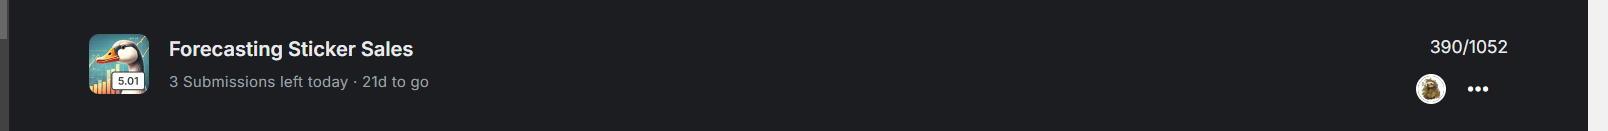